# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


In [3]:
import sys
sys.path.append('/home/fvalens11/tensorflow_env/lib/python3.12/site-packages')

In [4]:
import tensorflow

2025-04-27 21:20:57.320268: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 21:20:57.336541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 21:20:57.482432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 21:20:57.666332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745806857.830239     564 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745806857.87

## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

y_Train_cat = to_categorical(y_Train, num_classes=2)
y_Test_cat = to_categorical(y_Test, num_classes=2)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_Train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_Train_scaled, y_Train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_Test_scaled, y_Test_cat))

loss, accuracy = model.evaluate(X_Test_scaled, y_Test_cat)
print(f"Test Accuracy: {accuracy:.4f}")




/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1745807038.146511     564 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745807038.146952     564 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7898 - loss: 0.4522 - val_accuracy: 0.7970 - val_loss: 0.4363
Epoch 2/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8020 - loss: 0.4305 - val_accuracy: 0.7992 - val_loss: 0.4328
Epoch 3/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8025 - loss: 0.4291 - val_accuracy: 0.7994 - val_loss: 0.4339
Epoch 4/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8030 - loss: 0.4290 - val_accuracy: 0.8005 - val_loss: 0.4309
Epoch 5/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8036 - loss: 0.4268 - val_accuracy: 0.7987 - val_loss: 0.4311
Epoch 6/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8035 - loss: 0.4267 - val_accuracy: 0.8009 - val_loss: 0.4301
Epoch 7/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8033 - loss: 0.4276 - val_accuracy: 0.7999 - val_loss: 0.4309
Epoch 8/10
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8037 - loss: 0.4264 -

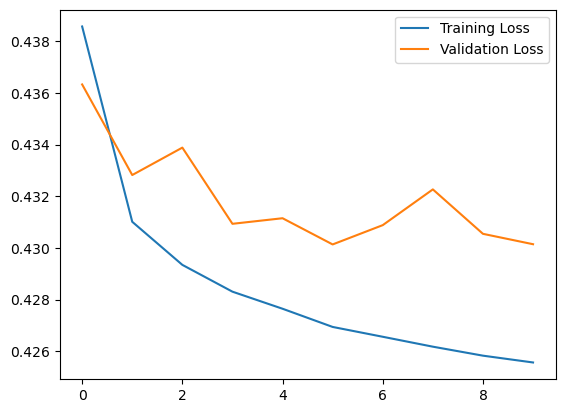

In [6]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

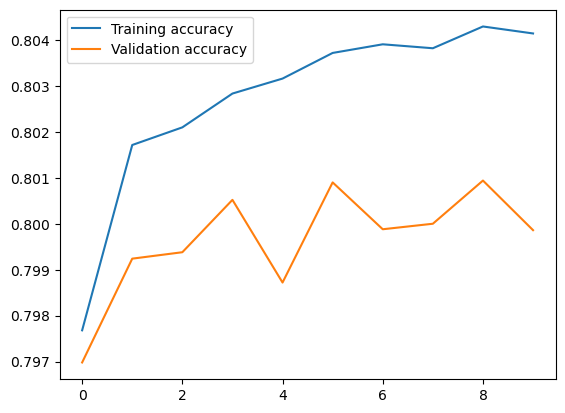

In [7]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

## Exercise 2

Following the original paper (see lab 7), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model using: Raw Variables
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
AUC (Raw Variables): 0.8708

Training model using: Feature Variables


/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
AUC (Feature Variables): 0.8631

Training model using: All Variables


/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step
AUC (All Variables): 0.8739


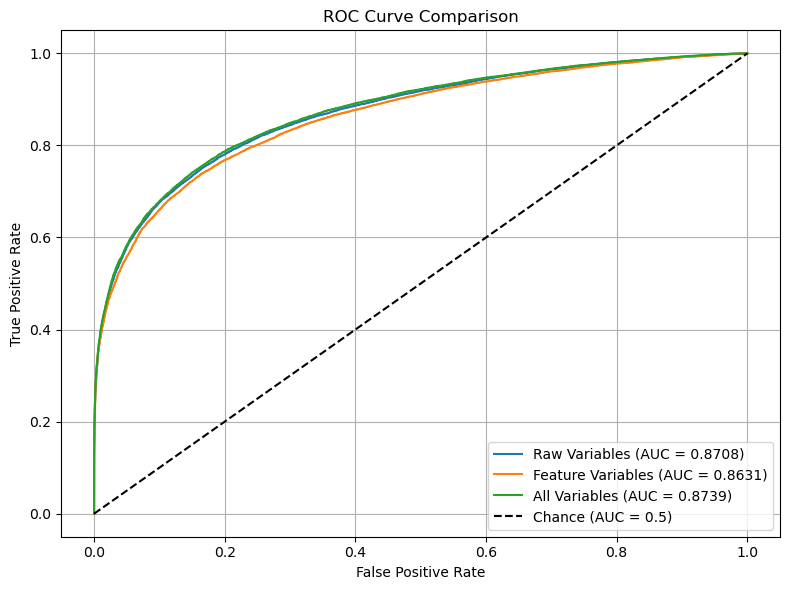

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

raw_vars = VarNames[1:9]
feat_vars = VarNames[9:19]
all_vars = VarNames[1:19]

X_sets = {
    "Raw Variables": (Train_Sample[raw_vars], Test_Sample[raw_vars]),
    "Feature Variables": (Train_Sample[feat_vars], Test_Sample[feat_vars]),
    "All Variables": (Train_Sample[all_vars], Test_Sample[all_vars])
}

y_Train_cat = to_categorical(y_Train, num_classes=2)
y_Test_cat = to_categorical(y_Test, num_classes=2)

roc_data = {}

def run_model_and_collect_roc(X_Train, X_Test, label):
    # Scale
    scaler = StandardScaler()
    X_Train_scaled = scaler.fit_transform(X_Train)
    X_Test_scaled = scaler.transform(X_Test)

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_Train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nTraining model using: {label}")
    model.fit(X_Train_scaled, y_Train_cat,
              epochs=10,
              batch_size=128,
              validation_data=(X_Test_scaled, y_Test_cat),
              verbose=0)

    y_pred_proba = model.predict(X_Test_scaled)[:, 1]  
    y_true = y_Test_cat[:, 1]

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[label] = (fpr, tpr, roc_auc)

    print(f"AUC ({label}): {roc_auc:.4f}")

for label, (X_Train_set, X_Test_set) in X_sets.items():
    run_model_and_collect_roc(X_Train_set, X_Test_set, label)

plt.figure(figsize=(8, 6))
for label, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.


Training: Deeper Network


/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deeper Network Test Accuracy: 0.8010
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training: Wider Network


/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Wider Network Test Accuracy: 0.7990
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step

Training: Dropout Regularized


/home/fvalens11/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dropout Regularized Test Accuracy: 0.7995
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step


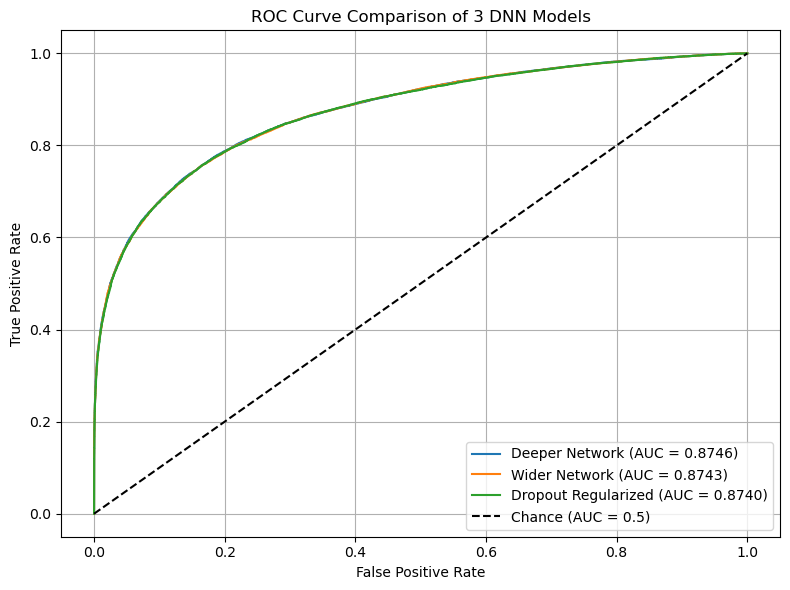

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

y_Train_cat = to_categorical(y_Train, num_classes=2)
y_Test_cat = to_categorical(y_Test, num_classes=2)


def build_model_1():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_Train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

def build_model_2():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_Train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

def build_model_3():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_Train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    return model

model_builders = {
    "Deeper Network": build_model_1,
    "Wider Network": build_model_2,
    "Dropout Regularized": build_model_3
}

roc_data = {}


for name, builder in model_builders.items():
    print(f"\nTraining: {name}")
    model = builder()
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_Train_scaled, y_Train_cat,
              epochs=10,
              batch_size=128,
              validation_data=(X_Test_scaled, y_Test_cat),
              verbose=0)

    loss, accuracy = model.evaluate(X_Test_scaled, y_Test_cat, verbose=0)
    print(f"{name} Test Accuracy: {accuracy:.4f}")

    y_pred_proba = model.predict(X_Test_scaled)[:, 1]
    y_true = y_Test_cat[:, 1]

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)


plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of 3 DNN Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Exercise 4

Repeat exercise 4 from Lab 8, adding your best performing DNN as one of the models.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

N_Train = 5000
Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

VarNames = df.columns.tolist()

y_Train = Train_Sample["signal"]
y_Test = Test_Sample["signal"]

raw_vars = VarNames[1:9]
feat_vars = VarNames[9:19]
all_vars = VarNames[1:19]

X_Train_raw = Train_Sample[raw_vars]
X_Test_raw = Test_Sample[raw_vars]

X_Train_feat = Train_Sample[feat_vars]
X_Test_feat = Test_Sample[feat_vars]

X_Train_all = Train_Sample[all_vars]
X_Test_all = Test_Sample[all_vars]

ridge_raw = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_feat = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_all = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

ridge_raw.fit(X_Train_raw, y_Train)
ridge_feat.fit(X_Train_feat, y_Train)
ridge_all.fit(X_Train_all, y_Train)

y_score_raw = ridge_raw.predict(X_Test_raw)
y_score_feat = ridge_feat.predict(X_Test_feat)
y_score_all = ridge_all.predict(X_Test_all)

fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_score_raw)
fpr_feat, tpr_feat, _ = roc_curve(y_Test, y_score_feat)
fpr_all, tpr_all, _ = roc_curve(y_Test, y_score_all)

auc_raw = auc(fpr_raw, tpr_raw)
auc_feat = auc(fpr_feat, tpr_feat)
auc_all = auc(fpr_all, tpr_all)

scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train_raw)
X_Test_scaled = scaler.transform(X_Test_raw)

y_Train_cat = to_categorical(y_Train, num_classes=2)
y_Test_cat = to_categorical(y_Test, num_classes=2)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_Train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_Train_scaled, y_Train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_Test_scaled, y_Test_cat),
                    verbose=0)

y_pred_dnn = model.predict(X_Test_scaled)[:, 1]
fpr_dnn, tpr_dnn, _ = roc_curve(y_Test, y_pred_dnn)
auc_dnn = auc(fpr_dnn, tpr_dnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Ridge - Raw (AUC = {auc_raw:.3f})')
plt.plot(fpr_feat, tpr_feat, label=f'Ridge - Features (AUC = {auc_feat:.3f})')
plt.plot(fpr_all, tpr_all, label=f'Ridge - All (AUC = {auc_all:.3f})')
plt.plot(fpr_dnn, tpr_dnn, label=f'DNN - Raw Only (AUC = {auc_dnn:.3f})', linestyle='--', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves - Ridge vs DNN (N_Train = {N_Train})')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
